<a href="https://colab.research.google.com/github/imyoungchae/Tensorflow_study/blob/main/tensorflow3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **이미지 분류**

# Noramalization(정규화)
- ex) 모든 이미지는 0~255 사이의 숫자로 되어 있습니다.
- 모든 픽셀 값이 0~1 사이의 값을 가지도록 합니다(Normalization)
- Normalization을 통해 96%의 성능이 98%로 올라간다

# One_hot
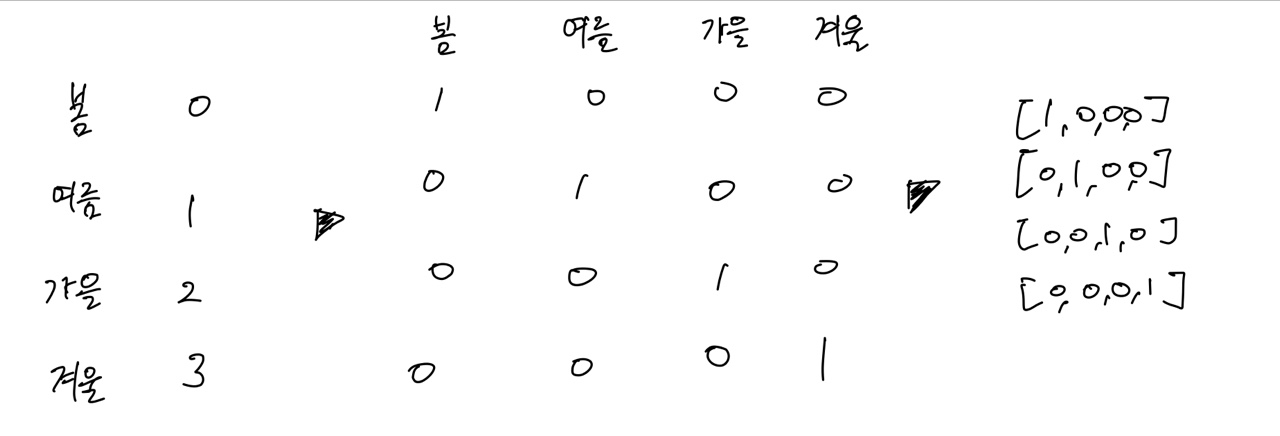

# activation function(활성함수)
- 선형함수만 층을 쌓게되면 선형*선형=선형관계이므로 층을 깊게하는 의미가 줄어든다
- 선형*비선형관계로 선형과 비선형을 쌓아 표현한다
- ex) relu(),sigmoid(),softmax()...  
- relu()는 중간층에 사용하고 sigmoid와 softmax()를 마지막 층에 사용한다

- tf.keras.layers.Dense(n)  tf.keras.layers.ReLu()  이 두 줄은  tf.kreras.layers.Dense(n,activation='relu')와 같다


# 분류
1. binary classification(2개)
- tf.keras.layers.Dense(1,activation='sigmoid') 의 경우: 
loss='binary_crossentropy'

- tf.keras.layers.Dense(2,activation='softmax') 의 경우(Dense가 2개 이상) :
loss='categorical_crossentropy'

- softmax() 노드의 확률값을 다 더하면 1이 된다


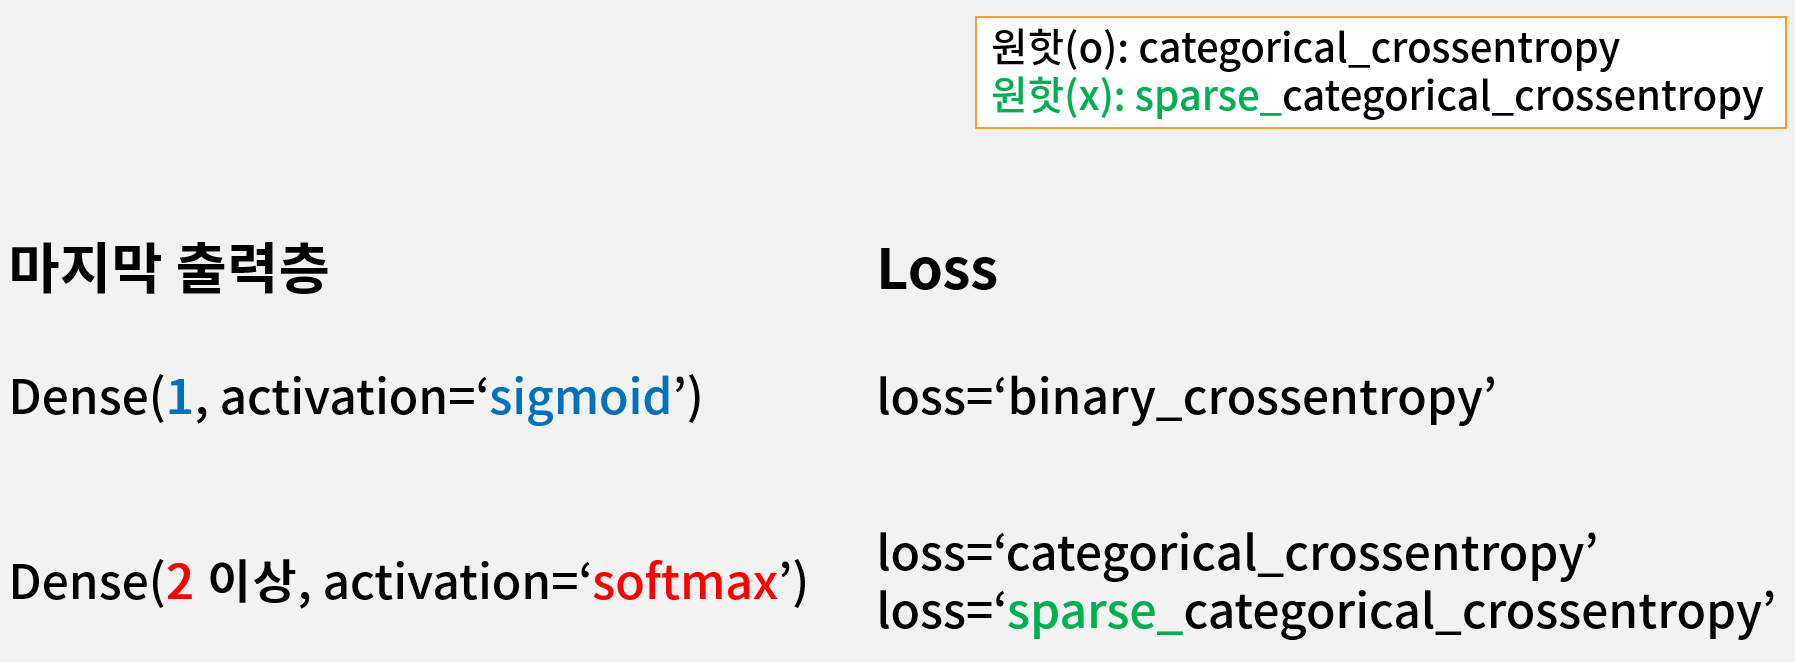

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape, x_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_valid.shape

((60000,), (10000,))

Normalization 이전의 최대,최소 확인

In [6]:
x_train.min(), x_train.max()

(0, 255)

Normalization

In [7]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

Normalization 이후의 최대,최소 확인

In [8]:
x_train.min(), x_train.max()

(0.0, 1.0)

Data Visualization

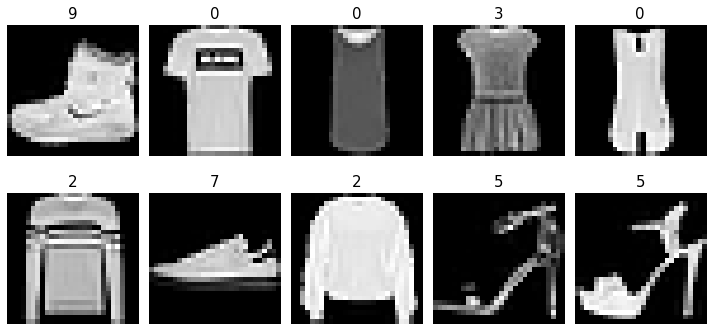

In [9]:
# 시각화
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

10개의 class
- 0: 티셔츠/탑
- 1: 바지
- 2: 풀오버(스웨터의 일종)
- 3: 드레스
- 4: 코트
- 5: 샌들
- 6: 셔츠
- 7: 스니커즈
- 8: 가방
- 9: 앵클 부츠

Flatten Layer

Flatten : 고차원을 1D로 변환하여 Dense Layer에 전달해주기 위하여 사용

atten Layer

Flatten : 고차원을 1D로 변환하여 Dense Layer에 전달해주기 위하여 사용

28x28의 2D로 되어 있는 이미지를 784로 펼쳐주는 작업

In [10]:
tf.keras.backend.set_floatx('float64')

변환 전

In [11]:
x_train.shape

(60000, 28, 28)

Flatten 적용 후

In [12]:
x = Flatten(input_shape=(28, 28))
print(x(x_train).shape)

(60000, 784)


활성함수(relu,sigmoid,softmax)

In [13]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

relu

In [14]:
def relu(x):
    return np.maximum(x, 0)

In [15]:
x = np.linspace(-10, 10)
y = relu(x)

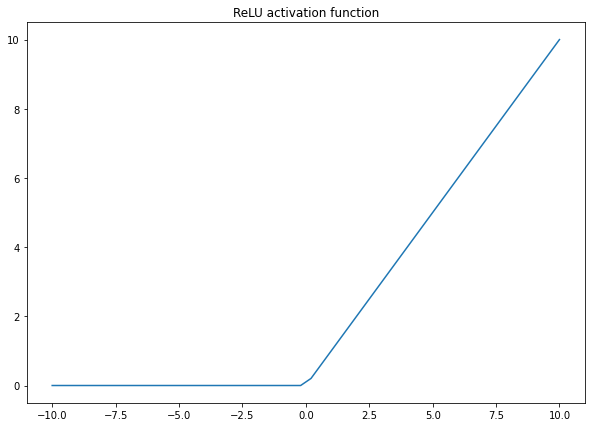

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.title('ReLU activation function')
plt.show()

Dense Layer에 Relu 적용

In [17]:
Dense(20, activation='relu')

sigmoid : z값을 0과 1 사이의 값으로 바꾸는 함수

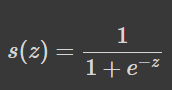

In [18]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

범위가 0과 1 사이에 있다

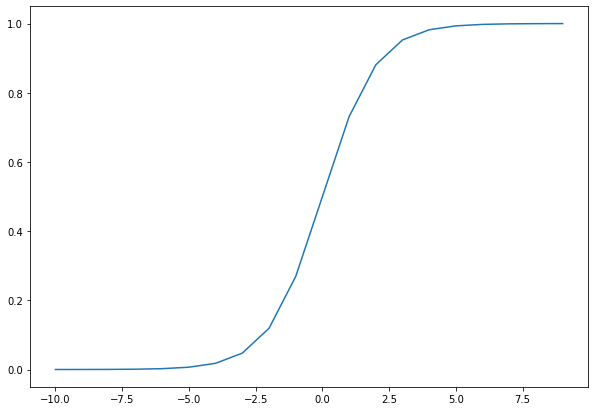

In [19]:
plt.figure(figsize=(10, 7))

x = np.arange(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

softmax : 뉴런의 출력값에 대해서 class 분류를 위하여 마지막 단계에서 출력값에 대한 정규화를 해주는 함수( 확률의 합은 언제나 1.0 )

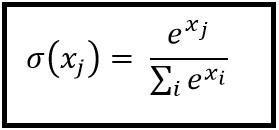

In [20]:
import numpy as np

a = np.random.uniform(low=0.0, high=10.0, size=3)

def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

y = softmax(a)
print('Class 별 확률 값 출력')
print('===' * 10)
for i in range(3):
    print('Class {} 의 확률: {:.3f}'.format(i, y[i]))
print('===' * 10)
print('Class 별 확률 값의 합: {:.1f}'.format(y.sum()))

Class 별 확률 값 출력
Class 0 의 확률: 0.077
Class 1 의 확률: 0.004
Class 2 의 확률: 0.919
Class 별 확률 값의 합: 1.0


다중분류의 맨 마지막 출력층 활성함수로는 Dense layer에 'softmax'를 적용함

단, Dense 레이어의 unit이 2보다 크거나 같은 경우에만 해당 (만약, 1이라면 'sigmoid'를 활성함수로 설정)

In [21]:
Dense(10, activation='softmax')

Modeling:

Sequential 모델 안에서 층을 깊게 쌓아 올려 준다

1. Dense 레이어는 2D 형태의 데이터를 받아들이지 못함. 

2. Flatten 레이어로 2D -> 1D로 변환 : 
깊은 출력층과 더 많은 Layer를 쌓음

3. Dense Layer에 activation='relu'를 적용

4. 분류(Classification)의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 같아야 함

In [22]:
model = Sequential([
    # Flatten으로 shape 펼치기
    Flatten(input_shape=(28, 28)),
    # Dense Layer
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    # Classification을 위한 Softmax 
    Dense(10, activation='softmax'), # class가 10개, Dense가 2보다 크므로 softmax 사용
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              803840    
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                6

Compile
1. optimizer는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용

2. loss설정
- 출력층 activation이 sigmoid 인 경우: binary_crossentropy
- 출력층 activation이 softmax 인 경우:
 - 원핫인코딩(O): categorical_crossentropy
 - 원핫인코딩(X): sparse_categorical_crossentropy)

3. metrics를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 가능

case1: 원핫인코딩(X)

In [24]:
y_train[0]

9

case2:원핫인코딩(O)


In [25]:
print(tf.one_hot(y_train[0], 10))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


model.compile()

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
# 원샷인코딩 상태가 아니므로 sparse_cateforical

ModelCheckpoint:

val_loss를 기준으로 epoch마다 최적의 모델을 저장하기 위해 만든다.

checkpoint_path는 모델이 저장될 파일 명을 설정

ModelCheckpoint를 선언하고 적절한 옵션 값을 지정

In [27]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

학습
1. validation_data를 반드시 지정
2. epochs을 적절하게 지정
3. callbacks에 바로 위에서 만든 checkpoint를 지정

In [28]:
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

Epoch 1/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.5009 - acc: 0.8174
Epoch 1: val_loss improved from inf to 0.45957, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 59s 31ms/step - loss: 0.5011 - acc: 0.8174 - val_loss: 0.4596 - val_acc: 0.8417
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.3729 - acc: 0.8649
Epoch 2: val_loss improved from 0.45957 to 0.42110, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3729 - acc: 0.8649 - val_loss: 0.4211 - val_acc: 0.8489
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.3386 - acc: 0.8759
Epoch 3: val_loss improved from 0.42110 to 0.38492, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3386 - acc: 0.8759 - val_loss: 0.3849 - val_acc: 0.8638
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.3127 - acc: 0.8

학습 완료 후 Load Weights(ModelCheckpoint)

학습이 완료된 후에는 반드시 load_weights 해주어야 한다

In [29]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)

검증

In [30]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 3s 10ms/step - loss: 0.3290 - acc: 0.8931


[0.3290225198149681, 0.8931]

오차에 대한 시각화

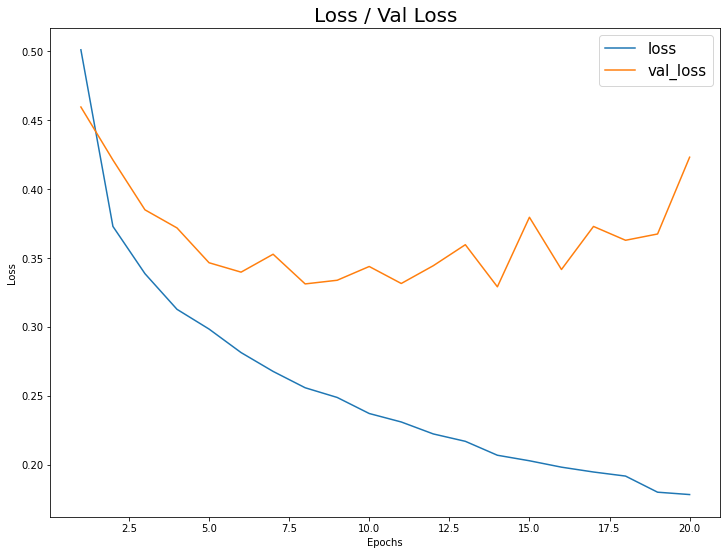

In [31]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

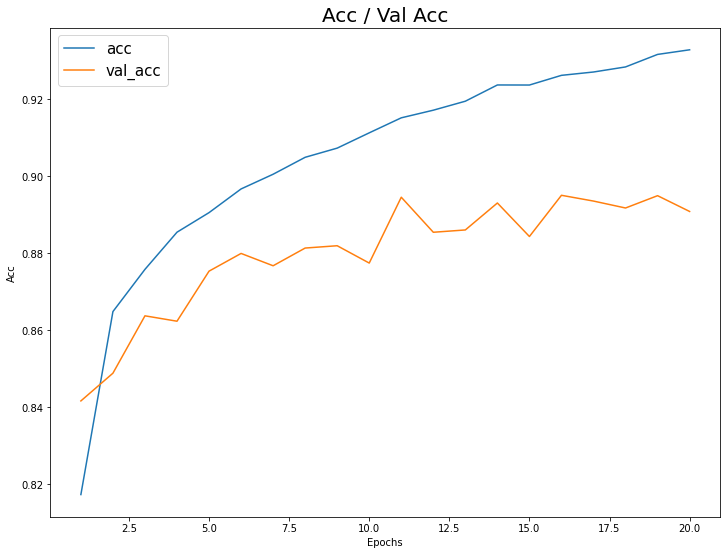

In [32]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()